In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from env import *

In [4]:
%matplotlib inline
import seaborn
seaborn.set()

In [5]:
len(train_images)

234842

In [6]:
len(test_images)

237152

# train data

In [7]:
train_labels.head()

labels  \
business_id                          
1000         (1, 2, 3, 4, 5, 6, 7)   
1001                  (0, 1, 6, 8)   
100             (1, 2, 4, 5, 6, 7)   
1006               (1, 2, 4, 5, 6)   
1010                     (0, 6, 8)   

                                                        photos  n_photo  
business_id                                                              
1000         [438623, 325966, 227692, 407856, 368729, 16319...       54  
1001         [298536, 20346, 8457, 308694, 349310, 407838, ...        9  
100          [338465, 328433, 243861, 361777, 127198, 46652...       84  
1006         [46472, 341947, 396253, 75316, 42330, 244095, ...       22  
1010         [118251, 219940, 27517, 8578, 148347, 433559, ...       11

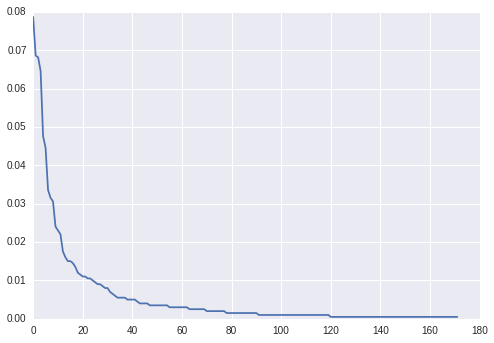

In [8]:
plt.plot(train_labels['labels'].value_counts(normalize=True))

# label, business, image

In [9]:
train_labels.index.unique()

array([1000, 1001,  100, ...,  997,  998,  999])

In [10]:
business_photo_size = train_photo_to_biz_ids.business_id.value_counts()

(array([   2.,   44.,  229.,  502.,  601.,  343.,  172.,   70.,   28.,    9.]),
 array([ 0.47712125,  0.77675783,  1.0763944 ,  1.37603097,  1.67566754,
         1.97530411,  2.27494068,  2.57457726,  2.87421383,  3.1738504 ,
         3.47348697]),
 <a list of 10 Patch objects>)

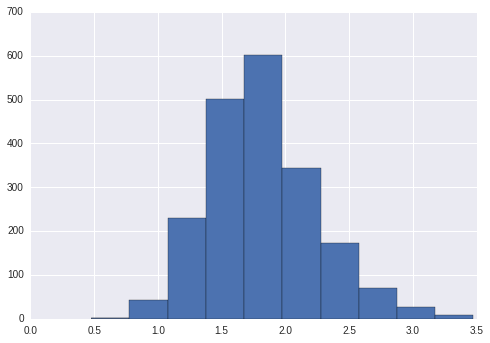

In [11]:
plt.hist(np.log10(1+business_photo_size.values))

In [12]:
n_photo_statistics_on_labels = train_labels.groupby('labels', as_index=True)['n_photo'].describe().to_frame().to_panel()[0]\
.sort_values('count', ascending=False)

In [13]:
n_photo_statistics_on_labels.shape[0]

172

In [14]:
train_labels.shape[0]

1996

In [15]:
n_photo_statistics_on_labels.head(20)

count        mean         std  min    25%   50%  \
labels                                                                   
(1, 2, 4, 5, 6, 7)       157  204.980892  385.131504    7  48.00  88.0   
(0, 3, 8)                137  102.233577  141.735942   12  29.00  53.0   
(1, 2, 3, 4, 5, 6, 7)    136  164.602941  285.534568    8  39.75  75.0   
(0, 8)                   129   58.007752   65.068653    7  22.00  37.0   
(3, 8)                    95   76.673684   66.334812    6  33.50  57.0   
(6, 8)                    89   93.438202  138.886804    8  33.00  49.0   
(1, 2, 3, 4, 5, 6)        67  174.432836  272.852453    2  46.50  77.0   
(8,)                      63   83.412698  120.727183    2  24.00  44.0   
(1, 2, 3, 5, 6, 7)        61  107.049180   96.474941   16  39.00  72.0   
(1, 2, 4, 5, 6)           48  250.625000  487.264340    7  35.75  80.5   
(0, 3, 5, 8)              46   95.413043  134.795578   11  35.00  56.5   
(1, 2, 5, 6, 8)           44  142.863636  177.239109   14  38.00  83.0   
(5, 6, 8)                 35   66.342857   40.764707   15  38.50  61.0   
(1, 2, 3, 5, 6)           32  118.812500  142.785749   14  29.75  76.5   
(0, 1, 8)                 30   46.400000   42.897311    5  20.25  28.0   
(3, 6, 8)                 30   84.033333   78.156996   14  42.25  61.0   
(1, 2, 3, 5, 6, 8)        29  126.241379  161.224700    9  50.00  79.0   
(1, 2, 5, 6, 7)           27  125.037037  122.823351   13  31.00  76.0   
(3, 5, 6, 8)              24  127.833333  173.134948   12  39.50  67.0   
(1, 2, 5, 6)              23  112.826087   87.952287   30  54.00  75.0   

                          75%   max  
labels                               
(1, 2, 4, 5, 6, 7)     179.00  2901  
(0, 3, 8)              104.00   942  
(1, 2, 3, 4, 5, 6, 7)  144.25  1870  
(0, 8)                  63.00   396  
(3, 8)                  89.50   390  
(6, 8)                  86.00   884  
(1, 2, 3, 4, 5, 6)     173.00  1954  
(8,)                    88.50   805  
(1, 2, 3, 5, 6, 7)     148.00   486  
(1, 2, 4, 5, 6)        292.00  2974  
(0, 3, 5, 8)            85.75   797  
(1, 2, 5, 6, 8)        133.25   821  
(5, 6, 8)               82.50   203  
(1, 2, 3, 5, 6)        146.25   733  
(0, 1, 8)               58.00   163  
(3, 6, 8)              104.00   396  
(1, 2, 3, 5, 6, 8)     123.00   760  
(1, 2, 5, 6, 7)        173.00   461  
(3, 5, 6, 8)           116.75   720  
(1, 2, 5, 6)           161.50   351

In [16]:
train_labels[train_labels['labels'].apply(lambda x: x==(0, 3, 5, 8))].sort('n_photo', ascending=False).head()

/home/genjian.li/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


labels                                             photos  \
business_id                                                                    
845          (0, 3, 5, 8)  [319184, 80607, 329594, 224567, 269200, 126785...   
1947         (0, 3, 5, 8)  [467638, 397618, 309126, 43144, 387648, 16119,...   
3105         (0, 3, 5, 8)  [46664, 397544, 253451, 328237, 137087, 84788,...   
2443         (0, 3, 5, 8)  [439163, 348696, 196667, 403491, 204807, 44060...   
3886         (0, 3, 5, 8)  [408829, 241055, 336645, 215312, 262012, 29350...   

             n_photo  
business_id           
845              797  
1947             436  
3105             340  
2443             242  
3886             212

labels
3: outdoor_seating


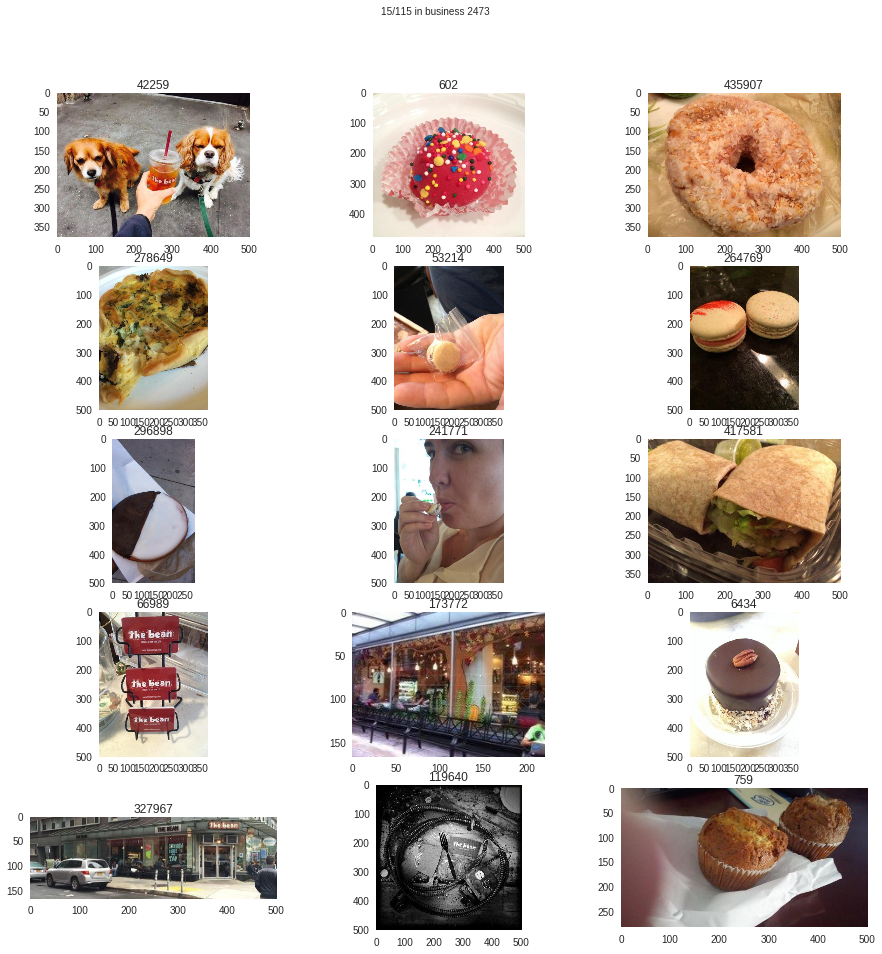

In [17]:
_ = show_photos_in_bussiness(2473, m=5, n=3)

labels
0: good_for_lunch
3: outdoor_seating
5: has_alcohol
8: good_for_kids


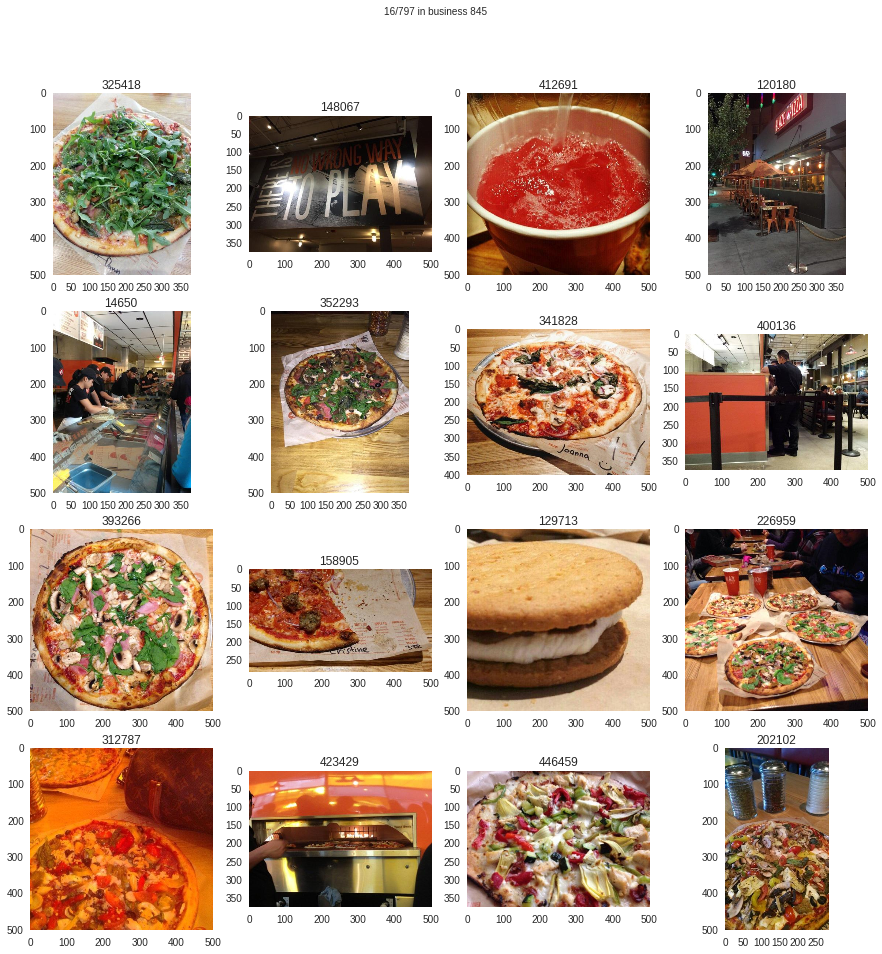

In [18]:
_ = show_photos_in_bussiness(845,m=4,n=4,seed=12)

In [19]:
n_photo_statistics_on_labels.shape[0]

172

In [20]:
n_photo_statistics_on_labels[n_photo_statistics_on_labels['count']>10].shape[0]

38

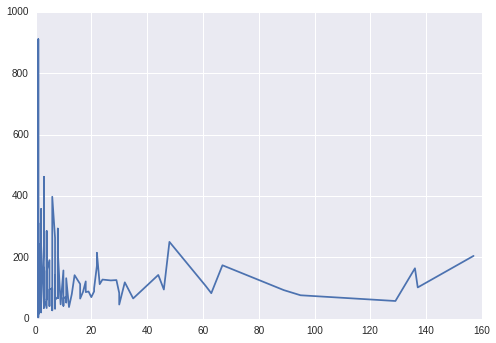

In [21]:
plt.plot(n_photo_statistics_on_labels['count'], n_photo_statistics_on_labels['mean'])

In [22]:
train_labels['labels'].value_counts(normalize=True).head(30)

(1, 2, 4, 5, 6, 7)          0.078657
(0, 3, 8)                   0.068637
(1, 2, 3, 4, 5, 6, 7)       0.068136
(0, 8)                      0.064629
(3, 8)                      0.047595
(6, 8)                      0.044589
(1, 2, 3, 4, 5, 6)          0.033567
(8,)                        0.031563
(1, 2, 3, 5, 6, 7)          0.030561
(1, 2, 4, 5, 6)             0.024048
(0, 3, 5, 8)                0.023046
(1, 2, 5, 6, 8)             0.022044
(5, 6, 8)                   0.017535
(1, 2, 3, 5, 6)             0.016032
(0, 1, 8)                   0.015030
(3, 6, 8)                   0.015030
(1, 2, 3, 5, 6, 8)          0.014529
(1, 2, 5, 6, 7)             0.013527
(3, 5, 6, 8)                0.012024
(1, 2, 5, 6)                0.011523
(1, 2, 4, 5, 6, 7, 8)       0.011022
(1, 2, 3, 4, 5, 6, 7, 8)    0.011022
(1, 2, 3, 5, 6, 7, 8)       0.010521
(0, 6, 8)                   0.010521
(0, 1, 2, 5, 6, 8)          0.010020
(1, 2, 5, 6, 7, 8)          0.009519
(0, 5, 8)                   0.009018
(

# label dependency

In [23]:
label_desc_dict

{0: 'good_for_lunch',
 1: 'good_for_dinner',
 2: 'takes_reservations',
 3: 'outdoor_seating',
 4: 'restaurant_is_expensive',
 5: 'has_alcohol',
 6: 'has_table_service',
 7: 'ambience_is_classy',
 8: 'good_for_kids'}

In [24]:
train_labels_splitted = pd.DataFrame(train_L, columns=['has_'+str(i) for i in range(9)], index= train_labels.index)

In [25]:
p0 = pd.DataFrame(train_L).mean().values

In [26]:
p0

array([ 0.33617234,  0.49749499,  0.51402806,  0.50250501,  0.2740481 ,
        0.6257515 ,  0.68136273,  0.28657315,  0.62024048])

In [27]:
pd.DataFrame(np.around(np.corrcoef(train_L.T), 3))

0      1      2      3      4      5      6      7      8
0  1.000 -0.352 -0.367 -0.007 -0.371 -0.322 -0.467 -0.348  0.400
1 -0.352  1.000  0.637 -0.042  0.514  0.540  0.500  0.508 -0.518
2 -0.367  0.637  1.000  0.037  0.559  0.632  0.652  0.559 -0.527
3 -0.007 -0.042  0.037  1.000  0.016  0.098 -0.059  0.015 -0.079
4 -0.371  0.514  0.559  0.016  1.000  0.454  0.415  0.560 -0.570
5 -0.322  0.540  0.632  0.098  0.454  1.000  0.611  0.451 -0.518
6 -0.467  0.500  0.652 -0.059  0.415  0.611  1.000  0.419 -0.449
7 -0.348  0.508  0.559  0.015  0.560  0.451  0.419  1.000 -0.506
8  0.400 -0.518 -0.527 -0.079 -0.570 -0.518 -0.449 -0.506  1.000

* 3 is independent
* 0,8 / 1,2,4,5,6,7

In [28]:
train_labels[train_labels_splitted.has_3==1].sort('n_photo', ascending=False).head()

/home/genjian.li/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


labels  \
business_id                          
487             (1, 2, 3, 4, 5, 6)   
1724         (1, 2, 3, 4, 5, 6, 7)   
1611         (1, 2, 3, 4, 5, 6, 7)   
1350               (0, 2, 3, 6, 8)   
3877         (1, 2, 3, 4, 5, 6, 7)   

                                                        photos  n_photo  
business_id                                                              
487          [343643, 160989, 237790, 382874, 239534, 43973...     1954  
1724         [437045, 8487, 135731, 232652, 81991, 5089, 40...     1870  
1611         [466936, 17715, 470096, 293667, 361267, 99076,...     1477  
1350         [332306, 417166, 329445, 70600, 446443, 161306...     1436  
3877         [130608, 123460, 461773, 319395, 93685, 72878,...     1146

labels
1: good_for_dinner
2: takes_reservations
3: outdoor_seating
4: restaurant_is_expensive
5: has_alcohol
6: has_table_service
7: ambience_is_classy


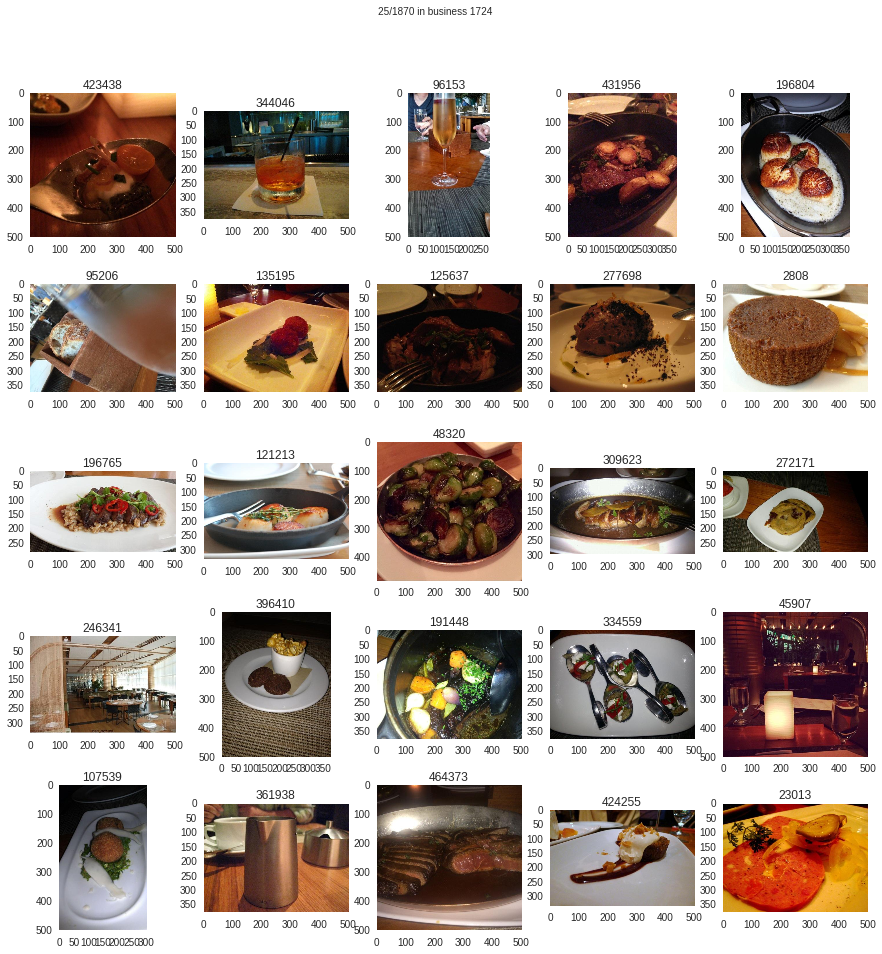

In [29]:
_ = show_photos_in_bussiness(1724,5,5)